<h1>เตรียม Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


<h1>สร้างโฟลเดอร์แยก genres

In [ ]:
import os

base_dir = "/content/drive/My Drive/Project DE242 Music Genre Classification/Dataset"
genres = ["Northern song", "Northeastern song", "Southern song", "Central song"]


for genre in genres:
    os.makedirs(os.path.join(base_dir, genre), exist_ok=True)

print("✅ สร้างโฟลเดอร์สำเร็จ!")


In [ ]:
base_dir = "/content/drive/My Drive/Project DE242 Music Genre Classification/Dataset"
genres = ["Northern song", "Northeastern song", "Southern song", "Central song"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import librosa
import pandas as pd
import numpy as np
import os

<h1>แปลงไฟล์เสียงเป็น .wav และปรับ Sample Rate & Mono/Stereo

สำหรับการแปลงเสียงจาก MP3 เป็นรูปแบบ WAV

In [ ]:
!apt-get install ffmpeg -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
!pip install pydub
from pydub import AudioSegment
from pydub.utils import which

AudioSegment.converter = which("ffmpeg")  # บอกให้ pydub ใช้ ffmpeg


In [ ]:
from pydub import AudioSegment
import os

base_dir = "/content/drive/My Drive/Project DE242 Music Genre Classification/Dataset"
output_dir = "/content/drive/My Drive/Project DE242 Music Genre Classification/Dataset_WAV"

for genre in genres:
    input_folder = os.path.join(base_dir, genre)
    output_folder = os.path.join(output_dir, genre)
    os.makedirs(output_folder, exist_ok=True)

    for file in os.listdir(input_folder):
        if file.endswith(".mp3"):
            mp3_path = os.path.join(input_folder, file)
            wav_path = os.path.join(output_folder, file.replace(".mp3", ".wav"))

            audio = AudioSegment.from_mp3(mp3_path)
            audio = audio.set_frame_rate(22050).set_channels(1)  # ตั้งค่า Sample Rate & Mono
            audio.export(wav_path, format="wav")

    print(f"✅ แปลงไฟล์ {genre} เสร็จแล้ว!")

✅ แปลงไฟล์ Northern song เสร็จแล้ว!
✅ แปลงไฟล์ Northeastern song เสร็จแล้ว!
✅ แปลงไฟล์ Southern song เสร็จแล้ว!
✅ แปลงไฟล์ Central song เสร็จแล้ว!


<h1>ตัดทุกเพลงในโฟลเดอร์ให้สั้นลง ตัดแบบ30วิแรก

In [ ]:
from pydub import AudioSegment
import os

# ตั้งค่าตำแหน่งโฟลเดอร์
base_dir = "/content/drive/My Drive/Project DE242 Music Genre Classification/Dataset_WAV"
output_dir = "/content/drive/My Drive/Project DE242 Music Genre Classification/Dataset_Cropped"

# ตั้งเวลาที่ต้องการตัด (มิลลิวินาที)
duration_ms = 30 * 1000  # 30 วินาที

# วนลูปตัดเพลงในทุกโฟลเดอร์
genres = ["Northern song", "Northeastern song", "Southern song", "Central song"]
for genre in genres:
    input_folder = os.path.join(base_dir, genre)
    output_folder = os.path.join(output_dir, genre)
    os.makedirs(output_folder, exist_ok=True)

    for file in os.listdir(input_folder):
        if file.endswith(".wav"):
            file_path = os.path.join(input_folder, file)
            output_path = os.path.join(output_folder, file)

            # โหลดไฟล์เสียง
            audio = AudioSegment.from_wav(file_path)

            # ตัดช่วง 30 วินาทีแรก
            cropped_audio = audio[:duration_ms]

            # บันทึกไฟล์ใหม่
            cropped_audio.export(output_path, format="wav")

    print(f"✅ ตัดเพลงใน {genre} เสร็จแล้ว!")


✅ ตัดเพลงใน Northern song เสร็จแล้ว!
✅ ตัดเพลงใน Northeastern song เสร็จแล้ว!
✅ ตัดเพลงใน Southern song เสร็จแล้ว!
✅ ตัดเพลงใน Central song เสร็จแล้ว!


<h1>ตัดทุกเพลงในโฟลเดอร์ให้สั้นลง ตัดเพลงเป็นช่วงๆเลื่อนทีละ 15 วินาที

In [ ]:
import os
from pydub import AudioSegment

# ตั้งค่าพารามิเตอร์
input_dir = "/content/drive/My Drive/Project DE242 Music Genre Classification/Dataset_WAV"
output_dir = "/content/drive/My Drive/Project DE242 Music Genre Classification/Dataset_Segments"

window_size = 30000  # 30 วินาที
step_size = 15000    # 15 วินาที (Overlap 50%)

# สร้างโฟลเดอร์สำหรับเก็บไฟล์ที่ถูกตัด
os.makedirs(output_dir, exist_ok=True)

# วนลูปผ่านทุกแนวเพลง
for genre in os.listdir(input_dir):
    genre_folder = os.path.join(input_dir, genre)
    output_genre_folder = os.path.join(output_dir, genre)

    # ข้ามถ้าไม่ใช่โฟลเดอร์
    if not os.path.isdir(genre_folder):
        continue

    os.makedirs(output_genre_folder, exist_ok=True)  # สร้างโฟลเดอร์สำหรับเก็บ segment

    # วนลูปผ่านไฟล์เพลงทั้งหมดในแต่ละแนวเพลง
    for file in os.listdir(genre_folder):
        if file.endswith(".wav"):
            file_path = os.path.join(genre_folder, file)
            audio = AudioSegment.from_wav(file_path)

            # ตัดเพลงเป็น segment
            segments = []
            for start in range(0, len(audio) - window_size, step_size):
                segment = audio[start:start + window_size]
                segments.append(segment)

            # บันทึก segment ลงโฟลเดอร์ output
            for i, segment in enumerate(segments):
                segment_path = os.path.join(output_genre_folder, f"{file.replace('.wav', '')}_seg{i}.wav")
                segment.export(segment_path, format="wav")

    print(f"✅ ตัดเพลงใน {genre} เสร็จแล้ว!")


✅ ตัดเพลงใน Northern song เสร็จแล้ว!
✅ ตัดเพลงใน Northeastern song เสร็จแล้ว!
✅ ตัดเพลงใน Southern song เสร็จแล้ว!
✅ ตัดเพลงใน Central song เสร็จแล้ว!


<h1>ดึง Chroma Features และ Spectral Contrast

In [ ]:
import librosa
import numpy as np
import os

dataset_dir = "/content/drive/My Drive/Project DE242 Music Genre Classification/Dataset_Segments"
features_list = []

for genre in os.listdir(dataset_dir):
    genre_folder = os.path.join(dataset_dir, genre)

    if os.path.isdir(genre_folder):  # ตรวจสอบว่าเป็นโฟลเดอร์จริง ๆ
        for file in os.listdir(genre_folder):
            if file.endswith(".wav"):  # ตรวจสอบว่าเป็นไฟล์เสียง
                file_path = os.path.join(genre_folder, file)

                # โหลดไฟล์เสียง
                y, sr = librosa.load(file_path, sr=22050)

                # ดึงฟีเจอร์ต่าง ๆ
                mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).mean(axis=1)
                chroma = librosa.feature.chroma_stft(y=y, sr=sr).mean(axis=1)
                spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr).mean(axis=1)

                # รวมทุกฟีเจอร์เข้าด้วยกัน
                features = np.hstack([mfcc, chroma, spectral_contrast])

                # เก็บข้อมูล
                features_list.append(features)

print(f"✅ Extracted Features from {len(features_list)} files!")


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


✅ Extracted Features from 4918 files!


<h1>แปลงเสียงเป็น MFCC (Mel-Frequency Cepstral Coefficients)

In [ ]:
import pandas as pd
import os

dataset = []
labels = []
genres = ["Northern song", "Northeastern song", "Southern song", "Central song"]  # ภาคต่างๆ
dataset_path = "/content/drive/My Drive/Project DE242 Music Genre Classification/Dataset_Segments"  # ตำแหน่งไฟล์เสียง

for genre in genres:
    genre_folder = os.path.join(dataset_path, genre)

    for file in os.listdir(genre_folder):
        if file.endswith(".wav"):
            file_path = os.path.join(genre_folder, file)
            y, sr = librosa.load(file_path, sr=22050)

            # ดึง Features
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).mean(axis=1)
            chroma = librosa.feature.chroma_stft(y=y, sr=sr).mean(axis=1)
            spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr).mean(axis=1)

            # รวม Features
            features = np.hstack([mfcc, chroma, spectral_contrast])
            dataset.append(features)
            labels.append(genre)

# สร้าง DataFrame
df = pd.DataFrame(dataset)
df["label"] = labels

# บันทึกเป็น CSV
df.to_csv("thai_music_dataset.csv", index=False)
print("✅ บันทึก dataset เรียบร้อย!")


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


✅ บันทึก dataset เรียบร้อย!


<h1>เทรนโมเดลแยกแนวเพลงด้วย Machine Learning (Random Forest)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("thai_music_dataset.csv")

X = df.iloc[:, :-1]  # Feature (MFCC)
y = df["label"]  # Label (Genre)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"🎯 Accuracy: {accuracy:.2f}")


🎯 Accuracy: 0.90


<h1>Confusion Matrix

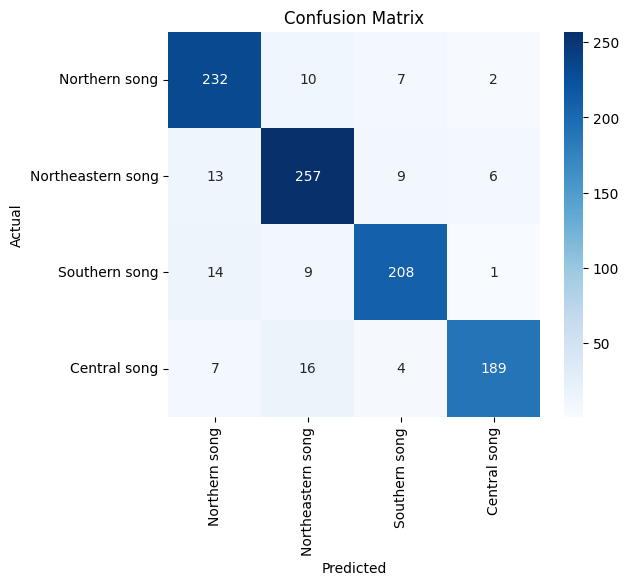

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ตรวจสอบว่า y_pred เป็น 1D หรือ 2D
if len(y_pred.shape) > 1:
    y_pred_classes = np.argmax(y_pred, axis=1)  # ถ้าเป็น 2D → argmax
else:
    y_pred_classes = y_pred  # ถ้าเป็น 1D → ใช้เลย

# ตรวจสอบว่า y_test เป็น 1D หรือ 2D
if len(y_test.shape) > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# คำนวณ Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# แสดง Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=genres, yticklabels=genres)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


<h1>Precision, Recall และ F1-Score


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes, target_names=genres))


                   precision    recall  f1-score   support

    Northern song       0.87      0.92      0.90       251
Northeastern song       0.88      0.90      0.89       285
    Southern song       0.91      0.90      0.90       232
     Central song       0.95      0.88      0.91       216

         accuracy                           0.90       984
        macro avg       0.90      0.90      0.90       984
     weighted avg       0.90      0.90      0.90       984



<h1>บันทึกโมเดล

In [ ]:
import joblib

# บันทึกโมเดล
joblib.dump(model, "/content/drive/My Drive/Project DE242 Music Genre Classification/random_forest_model.pkl")

print("✅ โมเดลถูกบันทึกเรียบร้อย!")


✅ โมเดลถูกบันทึกเรียบร้อย!


<h1>แปลงเพลงที่จะให้testเป็น.wav

In [ ]:
from pydub import AudioSegment
import os

# ฟังก์ชั่นสำหรับแปลงไฟล์ .mp3 เป็น .wav
def convert_mp3_to_wav(mp3_path, wav_path):
    audio = AudioSegment.from_mp3(mp3_path)
    audio = audio.set_frame_rate(22050).set_channels(1)  # ตั้งค่า Sample Rate และ Mono
    audio.export(wav_path, format="wav")
    print(f"✅ แปลงไฟล์ {mp3_path} เป็น {wav_path} เรียบร้อย!")

# ตัวอย่างเส้นทางของไฟล์
mp3_folder = "/content/drive/My Drive/Project DE242 Music Genre Classification/Unseen_Data"  # โฟลเดอร์ที่เก็บไฟล์ .mp3
output_folder = "/content/drive/My Drive/Project DE242 Music Genre Classification/Unseen_Data_WAV"  # โฟลเดอร์ที่จะเก็บไฟล์ .wav

# สร้างโฟลเดอร์สำหรับไฟล์ .wav ถ้ายังไม่มี
os.makedirs(output_folder, exist_ok=True)

# แปลงไฟล์ทั้งหมดในโฟลเดอร์ .mp3 เป็น .wav
for file in os.listdir(mp3_folder):
    if file.endswith(".mp3"):
        mp3_path = os.path.join(mp3_folder, file)
        wav_path = os.path.join(output_folder, file.replace(".mp3", ".wav"))
        convert_mp3_to_wav(mp3_path, wav_path)

print("✅ การแปลงไฟล์เสร็จสิ้น!")


✅ แปลงไฟล์ /content/drive/My Drive/Project DE242 Music Genre Classification/Unseen_Data/ลืมตัวแล้วหม้าย.mp3 เป็น /content/drive/My Drive/Project DE242 Music Genre Classification/Unseen_Data_WAV/ลืมตัวแล้วหม้าย.wav เรียบร้อย!
✅ แปลงไฟล์ /content/drive/My Drive/Project DE242 Music Genre Classification/Unseen_Data/พระแสงอะไร วงกลม Lyric Audio.mp3 เป็น /content/drive/My Drive/Project DE242 Music Genre Classification/Unseen_Data_WAV/พระแสงอะไร วงกลม Lyric Audio.wav เรียบร้อย!
✅ การแปลงไฟล์เสร็จสิ้น!


<h1>การทดสอบกับข้อมูลที่ไม่เคยเห็นมาก่อน (Unseen Data)

In [ ]:
import librosa
import numpy as np
import joblib  # ใช้ joblib สำหรับโหลดโมเดลที่ฝึกไว้
import os

# โหลดโมเดลที่เทรนไว้ (Random Forest)
model = joblib.load("/content/drive/My Drive/Project DE242 Music Genre Classification/random_forest_model.pkl")

# กำหนด label ของแนวเพลง
genres = ["Northern song", "Northeastern song", "Southern song", "Central song"]

# ฟังก์ชันดึงฟีเจอร์เสียง
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=22050)

    # ดึง MFCC, Chroma, Spectral Contrast
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).mean(axis=1)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr).mean(axis=1)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr).mean(axis=1)

    # รวมฟีเจอร์ทั้งหมด
    features = np.hstack([mfcc, chroma, spectral_contrast])
    return features

# 📂 โฟลเดอร์เก็บเพลงที่ใช้ทดสอบ (Unseen Data)
test_folder = "/content/drive/My Drive/Project DE242 Music Genre Classification/Unseen_Data_WAV"

# วนลูปผ่านไฟล์เสียงในโฟลเดอร์
for file in os.listdir(test_folder):
    if file.endswith(".wav"):
        file_path = os.path.join(test_folder, file)

        # ดึงฟีเจอร์
        features = extract_features(file_path)
        features = features.reshape(1, -1)  # Reshape ให้เข้ากับโมเดล

# ทำการพยากรณ์แนวเพลง
prediction = model.predict(features)

# Access the predicted label directly
predicted_label = prediction[0]

print(f"🎵 ไฟล์: {file} → ทำนายว่าเป็นแนวเพลง: {predicted_label}")


🎵 ไฟล์: พระแสงอะไร วงกลม Lyric Audio.wav → ทำนายว่าเป็นแนวเพลง: Southern song


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
